<a href="https://colab.research.google.com/github/gaditi123/quant/blob/main/Basic_Analysis(all).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader.data as web
import datetime

import tesla stock

In [33]:
start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2021, 1, 1)
tesla_stock = web.DataReader('TSLA', 'yahoo', start, end)
tesla_stock.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,63.026001,59.759998,61.220001,62.023998,58293000.0,62.023998
2019-01-03,61.880001,59.476002,61.400002,60.071999,34826000.0,60.071999
2019-01-04,63.599998,60.546001,61.200001,63.537998,36970500.0,63.537998
2019-01-07,67.348000,63.549999,64.344002,66.991997,37756000.0,66.991997
2019-01-08,68.802002,65.403999,68.391998,67.070000,35042500.0,67.070000


In [34]:
ford_stock = web.DataReader('F', 'yahoo', start, end)
ford_stock.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,8.02,7.48,7.53,7.90,47494400.0,7.284280
2019-01-03,7.99,7.78,7.97,7.78,39172400.0,7.173633
2019-01-04,8.12,7.85,7.91,8.08,43039800.0,7.450252
2019-01-07,8.37,8.03,8.11,8.29,40729400.0,7.643884
2019-01-08,8.54,8.35,8.42,8.37,45644000.0,7.717649


In [35]:
gm_stock = web.DataReader('GM', 'yahoo', start, end)
gm_stock.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,33.810001,32.410000,32.849998,33.639999,7662300.0,31.893360
2019-01-03,33.680000,32.200001,33.340000,32.250000,11618300.0,30.575533
2019-01-04,33.570000,32.430000,32.799999,33.330002,10784000.0,31.599455
2019-01-07,34.970001,33.480000,33.709999,34.360001,10722300.0,32.575977
2019-01-08,35.680000,34.490002,35.000000,34.810001,10532900.0,33.002617


# Visulising Data

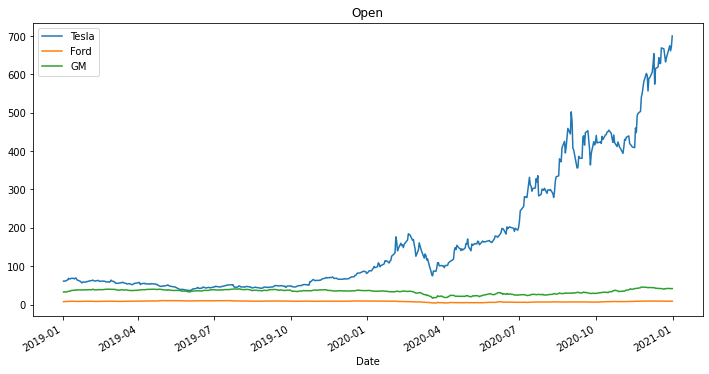

In [36]:
fig = plt.figure(figsize = (12, 6))
plt.title('Open')

tesla_stock['Open'].plot(label = 'Tesla')
ford_stock['Open'].plot(label = 'Ford')
gm_stock['Open'].plot(label = 'GM')
plt.legend()

 Plot the Volume of stock traded each day.

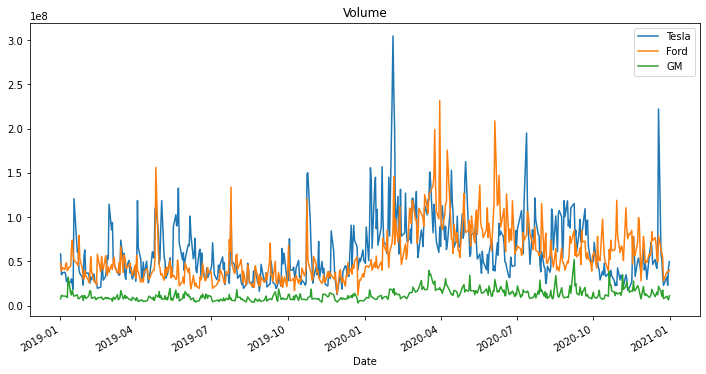

In [37]:
fig = plt.figure(figsize = (12, 6))
plt.title('Volume')

tesla_stock['Volume'].plot(label = 'Tesla')
ford_stock['Volume'].plot(label = 'Ford')
gm_stock['Volume'].plot(label = 'GM')
plt.legend()

create a new column to get a better idea of the market cap of these stocks.

In [38]:
tesla_stock['Total Traded'] = tesla_stock['Open'] * tesla_stock['Volume']
ford_stock['Total Traded'] = ford_stock['Open'] * ford_stock['Volume']
gm_stock['Total Traded'] = gm_stock['Open'] * gm_stock['Volume']

plotting total traded

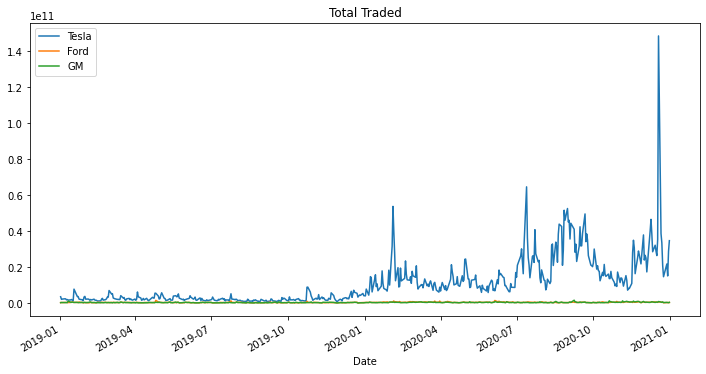

In [39]:
fig = plt.figure(figsize = (12, 6))
plt.title('Total Traded')

tesla_stock['Total Traded'].plot(label = 'Tesla')
ford_stock['Total Traded'].plot(label = 'Ford')
gm_stock['Total Traded'].plot(label = 'GM')
plt.legend()

# Moving Averages

GM

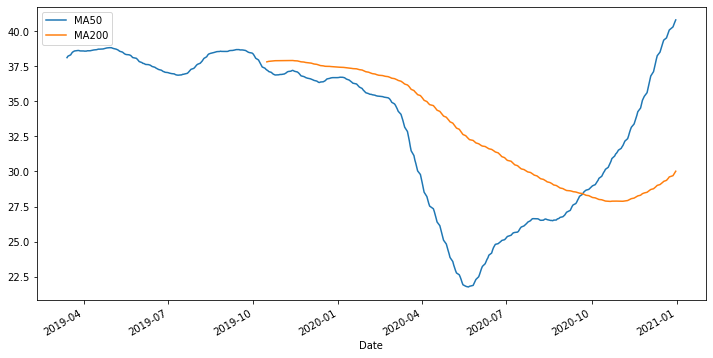

In [40]:
fig = plt.figure(figsize = (12, 6))
gm_stock.rolling(window = 50).mean()['Open'].plot(label = 'MA50')
gm_stock.rolling(window = 200).mean()['Open'].plot(label = 'MA200')
plt.legend()

candlesticks plot

In [41]:
import plotly.graph_objects as go
start = '2020-11'
end = '2020-12'
ford_candle = ford_stock.loc[start:end]
fig = go.Figure(data=[go.Candlestick(x=tesla_stock.loc[start:end].index,
                open=tesla_stock.loc[start:end]['Open'],
                high=tesla_stock.loc[start:end]['High'],
                low=tesla_stock.loc[start:end]['Low'],
                close=tesla_stock.loc[start:end]['Close'])])

fig.show()

# Basic Financial Analysis

daily percentage change - helps to find the volatality of the stock.If daily returns have a wide distribution, the stock is more volatile from one day to the next. 

In [42]:
tesla_stock['returns'] = (tesla_stock['Close'] / tesla_stock['Close'].shift(1)) - 1

In [43]:
tesla_stock.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2019-01-02,63.026001,59.759998,61.220001,62.023998,58293000.0,62.023998,3.568698e+09,NaN
2019-01-03,61.880001,59.476002,61.400002,60.071999,34826000.0,60.071999,2.138316e+09,-0.031472
2019-01-04,63.599998,60.546001,61.200001,63.537998,36970500.0,63.537998,2.262595e+09,0.057697
2019-01-07,67.348000,63.549999,64.344002,66.991997,37756000.0,66.991997,2.429372e+09,0.054361
2019-01-08,68.802002,65.403999,68.391998,67.070000,35042500.0,67.070000,2.396627e+09,0.001164


In [44]:
ford_stock['returns'] = (ford_stock['Close'] / ford_stock['Close'].shift(1)) - 1
gm_stock['returns'] = (gm_stock['Close'] / gm_stock['Close'].shift(1)) - 1

Plotting returns of each company to judge volatality

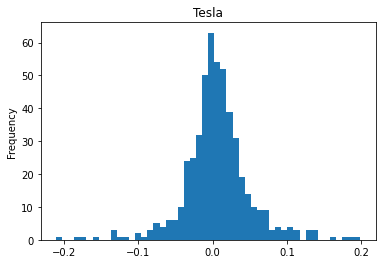

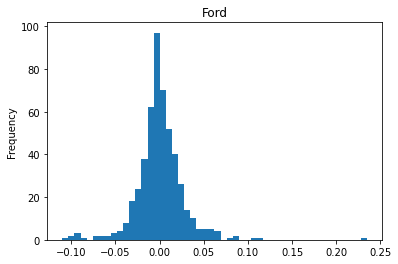

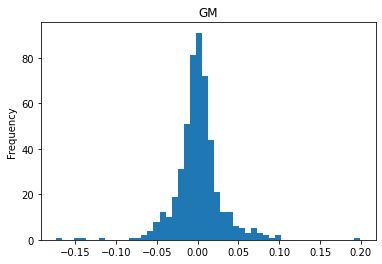

In [45]:
fig = plt.figure(0)
tesla_stock['returns'].plot(kind = 'hist', bins = 50)
plt.title('Tesla')

plt.show()

fig = plt.figure(1)
ford_stock['returns'].plot(kind = 'hist', bins = 50)
plt.title('Ford')
plt.show()

fig = plt.figure(2)
gm_stock['returns'].plot(kind = 'hist', bins = 50)
plt.title('GM')
plt.show()

Plotting on one graph

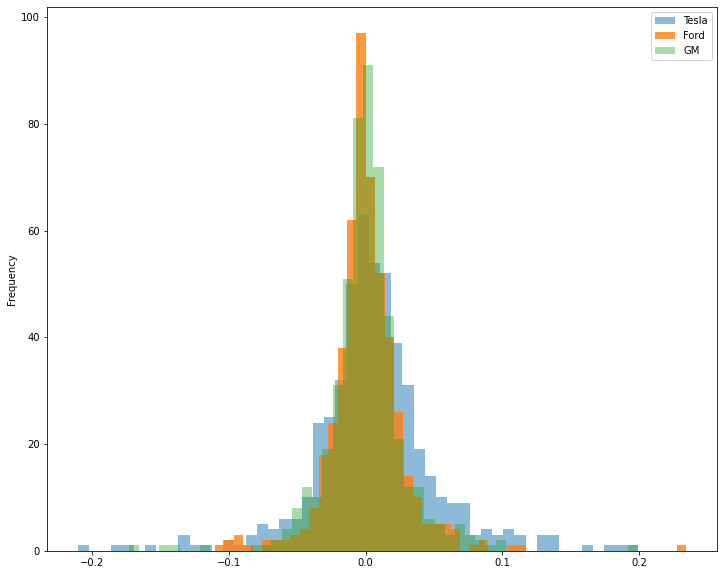

In [46]:
fig = plt.figure(figsize = (12, 10))
tesla_stock['returns'].plot(kind = 'hist', 
                            bins = 50, 
                            label = 'Tesla', 
                            alpha = 0.5)
ford_stock['returns'].plot(kind = 'hist', 
                            bins = 50, 
                            label = 'Ford',
                            alpha = 0.8)
gm_stock['returns'].plot(kind = 'hist', 
                            bins = 50, 
                            label = 'GM', 
                            alpha = 0.4)
plt.legend()

plotting KDE

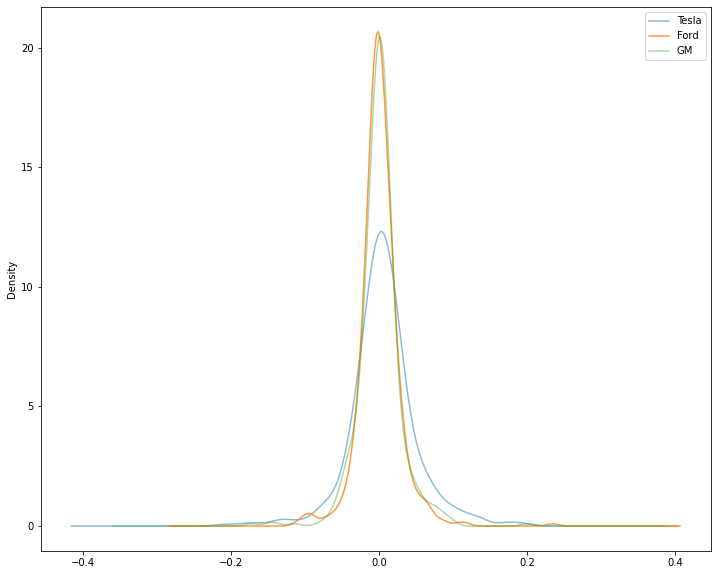

In [47]:
fig = plt.figure(figsize = (12, 10))
tesla_stock['returns'].plot(kind = 'kde', 
                            label = 'Tesla', 
                            alpha = 0.5)
ford_stock['returns'].plot(kind = 'kde', 
                           label = 'Ford',
                           alpha = 0.8)
gm_stock['returns'].plot(kind = 'kde',
                         label = 'GM', 
                         alpha = 0.4)
plt.legend()

No handles with labels found to put in legend.


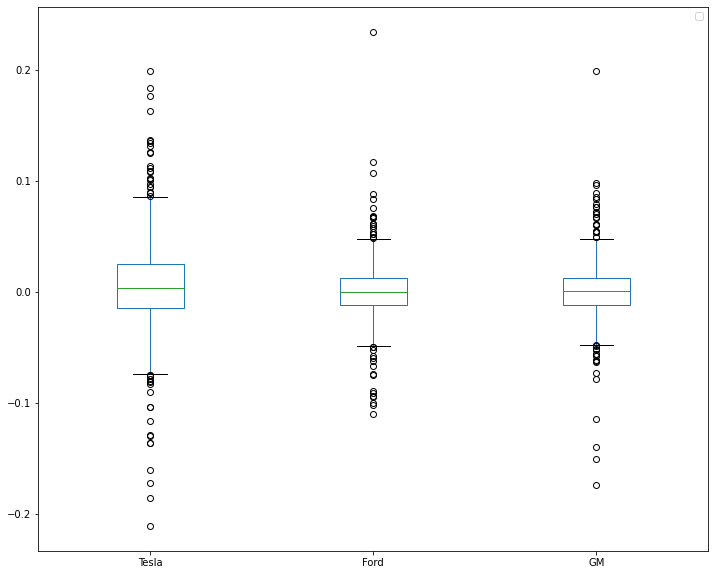

In [48]:
box_df = pd.concat([tesla_stock['returns'], ford_stock['returns'], gm_stock['returns']], axis = 1)
box_df.columns = ['Tesla', 'Ford', 'GM']
box_df.plot(kind = 'box', figsize = (12, 10))
plt.legend()

# Comparing Daily Returns between Stocks

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f922ebd2e90>,
      dtype=object)

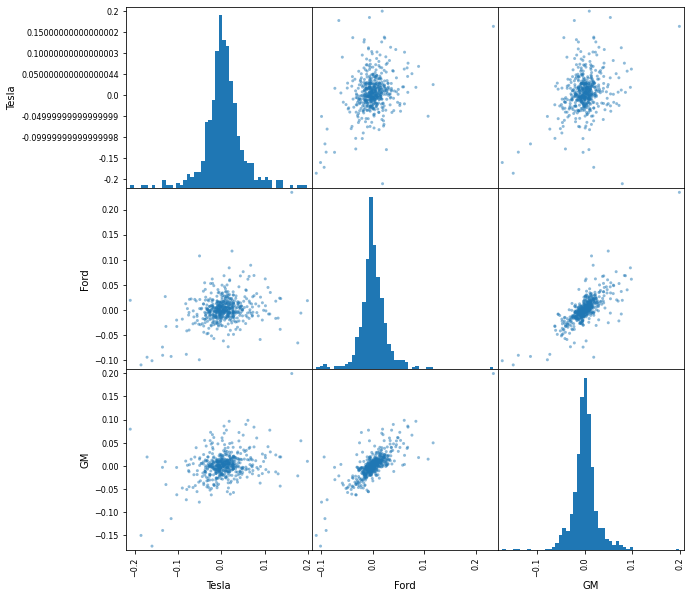

In [49]:
from pandas.plotting import scatter_matrix

scatter_matrix(box_df, figsize = (10, 10), hist_kwds={'bins':50})

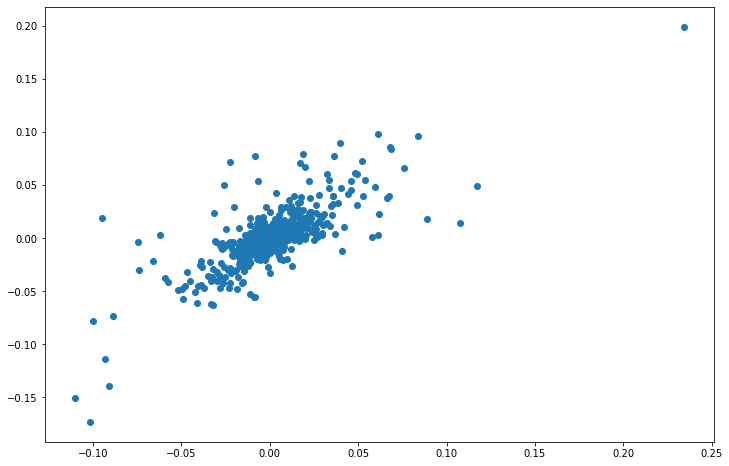

In [50]:
fig = plt.figure(figsize = (12, 8))
plt.scatter(ford_stock['returns'], gm_stock['returns'])

# Cumulative Daily Returns

In [51]:
tesla_stock['Cumulative Return'] = (1 + tesla_stock['returns']).cumprod()
tesla_stock.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns,Cumulative Return
Date,,,,,,,,,
2019-01-02,63.026001,59.759998,61.220001,62.023998,58293000.0,62.023998,3.568698e+09,NaN,NaN
2019-01-03,61.880001,59.476002,61.400002,60.071999,34826000.0,60.071999,2.138316e+09,-0.031472,0.968528
2019-01-04,63.599998,60.546001,61.200001,63.537998,36970500.0,63.537998,2.262595e+09,0.057697,1.024410
2019-01-07,67.348000,63.549999,64.344002,66.991997,37756000.0,66.991997,2.429372e+09,0.054361,1.080098
2019-01-08,68.802002,65.403999,68.391998,67.070000,35042500.0,67.070000,2.396627e+09,0.001164,1.081356


In [52]:
ford_stock['Cumulative Return'] = (1 + ford_stock['returns']).cumprod()
gm_stock['Cumulative Return'] = (1 + gm_stock['returns']).cumprod()

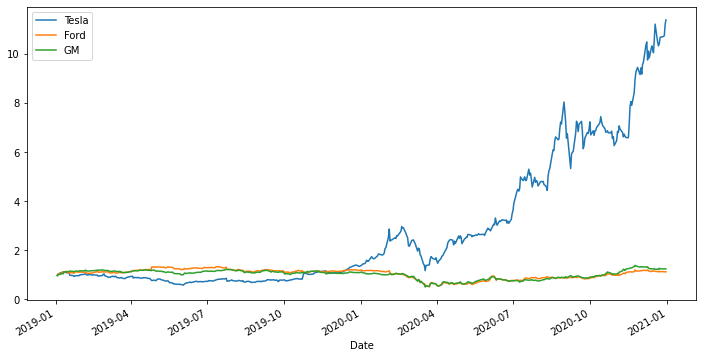

In [53]:
fig = plt.figure(figsize = (12, 6))
tesla_stock['Cumulative Return'].plot(label = 'Tesla')
ford_stock['Cumulative Return'].plot(label = 'Ford')
gm_stock['Cumulative Return'].plot(label = 'GM')
plt.legend()

# EWMA

In [54]:
tesla_stock['6-month-MA'] = tesla_stock['Close'].rolling(window=6).mean()

In [55]:
tesla_stock['12-month-MA'] = tesla_stock['Close'].rolling(window=12).mean()

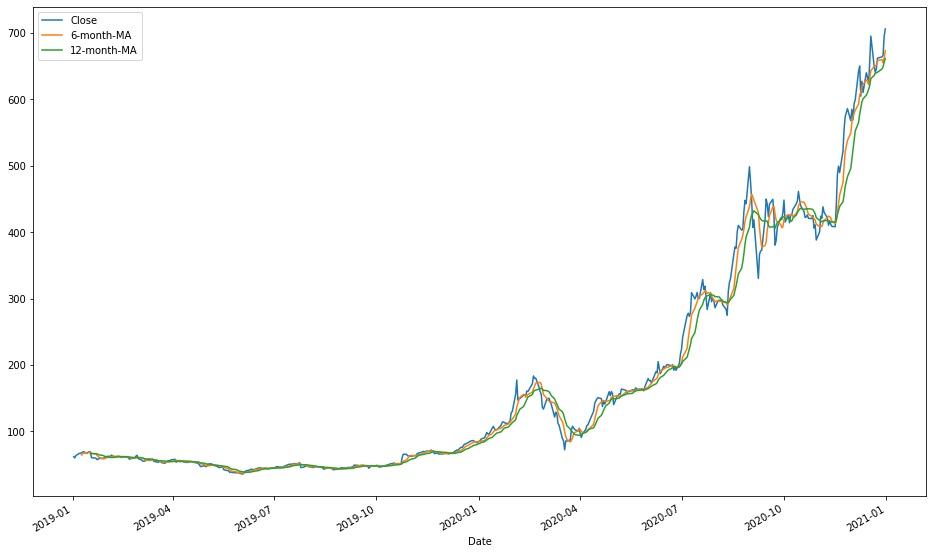

In [56]:
tesla_stock[['Close','6-month-MA','12-month-MA']].plot(figsize=(16,10))

In [57]:
tesla_stock['EWMA-12'] = tesla_stock['Close'].ewm(span=12).mean()

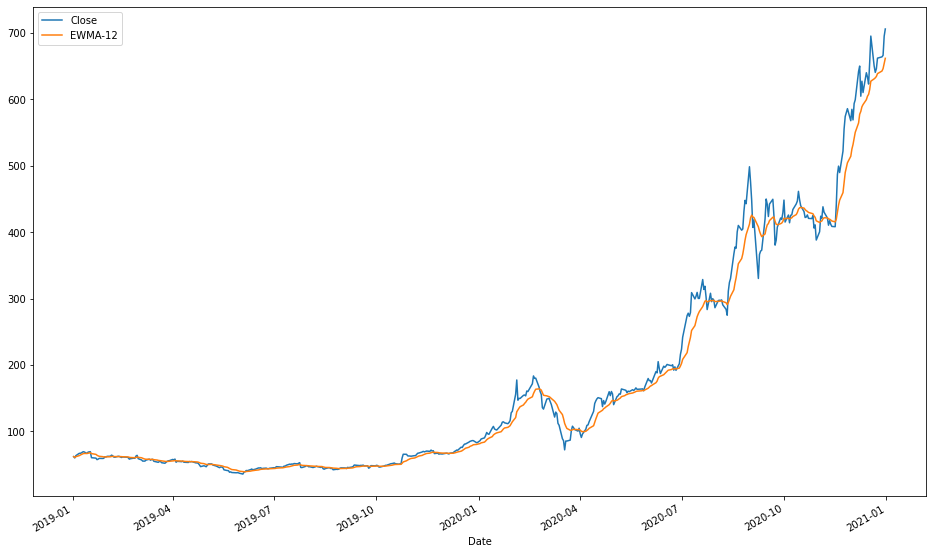

In [58]:
tesla_stock[['Close','EWMA-12']].plot(figsize=(16,10))

# ETS Decomposition - error trend and sesonality components

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [81]:
tesla_stock= tesla_stock.dropna()
result = seasonal_decompose(tesla_stock['Close'],model ='additive',freq=200)

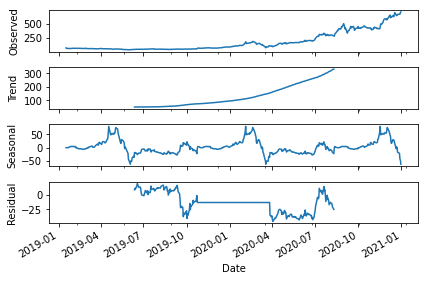

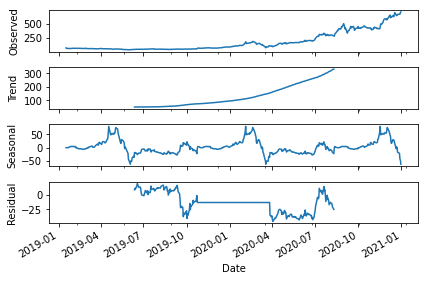

In [84]:
result.plot()